# Activation maps

This notebook shows how to use `osculari` to obtain activation maps for a network at multiple layers.
This technique is useful for several further analyses including representational-similarity-analysis
(RSA).

[![](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/ArashAkbarinia/osculari/blob/main/docs/source/notebooks/activation_maps.ipynb)

If you are running this notebook on Google Colab, install osculari by uncommenting and executing
the cell below.

In [1]:
# !pip install osculari

In [1]:
# importing required packages
from osculari import models

import numpy as np
import requests
from matplotlib import pyplot as plt
from PIL import Image as pil_image
import torch
import torchvision.transforms as torch_transforms

## AlexNet

The `models.ActivationLoader` class allows a simple way to load activations for one or several
layers of a network. The `ActivationLoader` class requires the following arguments:
* `architecture` is the network's architecture you want to load (e.g. `resnet50` or `vit_b_32`).
It should be one of the items from the available models we mentioned above.
* `weights` defines the pretrained weights. It can be one of the following formats:
  - Path to a local file.
  - Downloadable URL of the pretrained weights.
  - A string corresponding to the available weight, for instance, [PyTorch resnet50](https://pytorch.org/vision/stable/models/generated/torchvision.models.resnet50.html) supports one
of the following strings: \["*DEFAULT*", "*IMAGENET1K_V1*", "*IMAGENET1K_V2*"\].
  - The same name as `architecture`, which loads the network's default weights.
* `layers` determines the read-out (cut-off) layer(s). Which layers are available for each network
can be obtained by calling the `models.available_layers()` function.

In this example, we obtain activation maps of all AlexNet layers.

In [2]:
architecture = 'alexnet'         # networks' architecture
weights = 'alexnet'              # the pretrained weights
readout_kwargs = {               # parameters for loading activations from the pretrained network
    'architecture': architecture, 
    'weights': weights,
    'layers': models.available_layers(architecture)
}
activation_loader = models.ActivationLoader(**readout_kwargs)

Shape of the input image: torch.Size([1, 3, 224, 224])


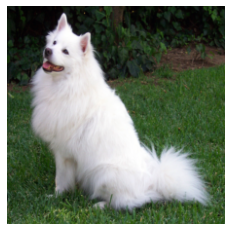

In [3]:
# reading an image
url = 'https://github.com/pytorch/hub/raw/master/images/dog.jpg'
input_img = pil_image.open(requests.get(url, stream=True).raw)

img_size = 224
mean, std = activation_loader.normalise_mean_std
# converting it to torch tensor
transforsm = torch_transforms.Compose([
    torch_transforms.Resize((img_size, img_size)),
    torch_transforms.ToTensor(),
    torch_transforms.Normalize(mean=mean, std=std)
])
torch_img = torch.stack([transforsm(input_img)])
print('Shape of the input image:', torch_img.shape)

# visualising the image that will be input to the network
img_vis = torch_img.numpy().squeeze().transpose(1, 2, 0) * std + mean
img_vis = np.maximum(np.minimum(img_vis, 1), 0)
plt.imshow(img_vis)
plt.axis('off')
plt.show()

We can now load activation maps for our image. Note that `activation_loader` is like any other 
`torch.nn.Module` and is callable. In this exampple, we input the network with one image, but multiple images can also be input.

In [4]:
# loading the activation maps
activation_maps = activation_loader(torch_img)
print('Layers whose activation maps is stored with corresponding size:')
for layer_name, activations in activation_maps.items():
    print('\tLayer: %s' % layer_name, '\tshape:', activations.shape)

Layers whose activation maps is stored with corresponding size:
	Layer: feature0 	shape: torch.Size([1, 64, 55, 55])
	Layer: feature1 	shape: torch.Size([1, 64, 55, 55])
	Layer: feature2 	shape: torch.Size([1, 64, 27, 27])
	Layer: feature3 	shape: torch.Size([1, 192, 27, 27])
	Layer: feature4 	shape: torch.Size([1, 192, 27, 27])
	Layer: feature5 	shape: torch.Size([1, 192, 13, 13])
	Layer: feature6 	shape: torch.Size([1, 384, 13, 13])
	Layer: feature7 	shape: torch.Size([1, 384, 13, 13])
	Layer: feature8 	shape: torch.Size([1, 256, 13, 13])
	Layer: feature9 	shape: torch.Size([1, 256, 13, 13])
	Layer: feature10 	shape: torch.Size([1, 256, 13, 13])
	Layer: feature11 	shape: torch.Size([1, 256, 13, 13])
	Layer: feature12 	shape: torch.Size([1, 256, 6, 6])
	Layer: classifier1 	shape: torch.Size([1, 4096])
	Layer: classifier2 	shape: torch.Size([1, 4096])
	Layer: classifier4 	shape: torch.Size([1, 4096])
	Layer: classifier5 	shape: torch.Size([1, 4096])
	Layer: fc 	shape: torch.Size([1, 10

From the print above, we can see the layers whose activation maps are loaded and the size of 
the activation maps:
 - The first dimension corresponds to batch size. This example is "1" because we have input
   the network with one image.
 - The `featureX` layers have three numbers: the number of kernels, spatial width, and spatial height.
 - The `classifierX` layers are only one-dimensional vectors.

## Visualising activations

Let's visualise the activation maps of twelve kernels in each layer.

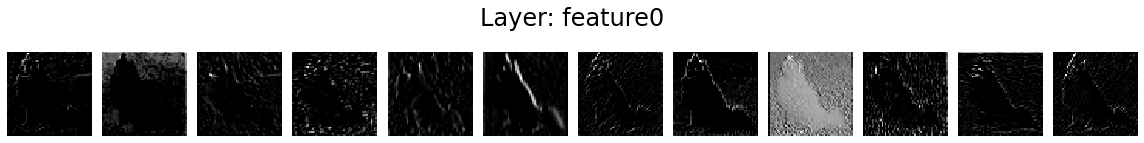

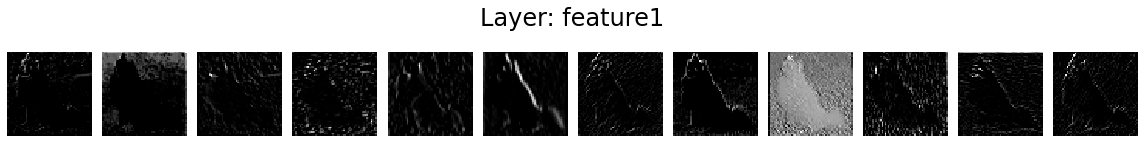

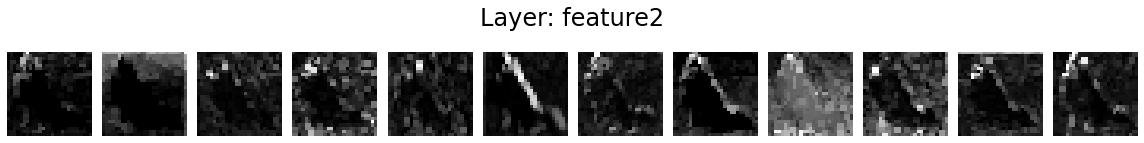

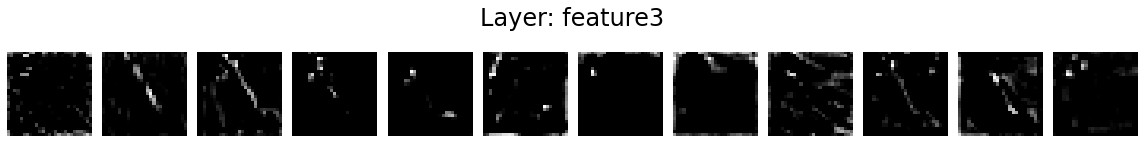

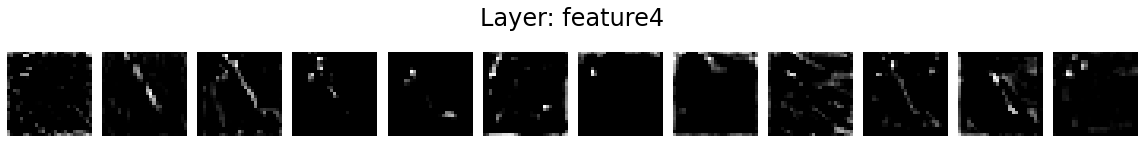

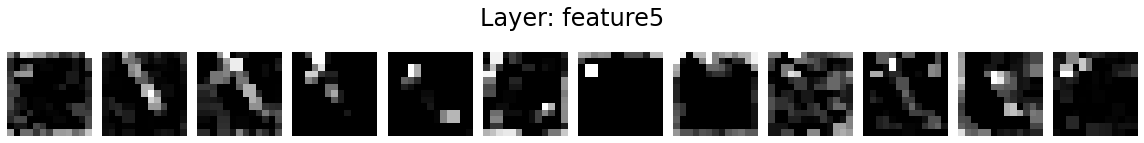

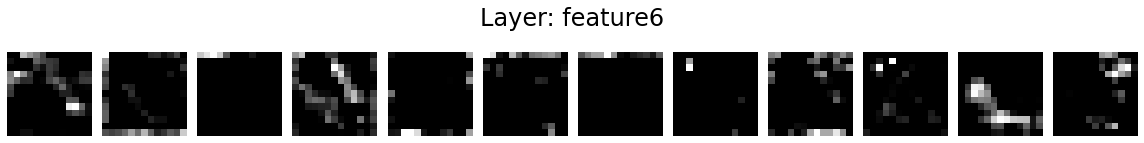

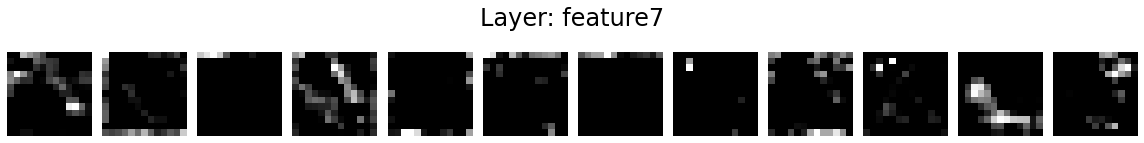

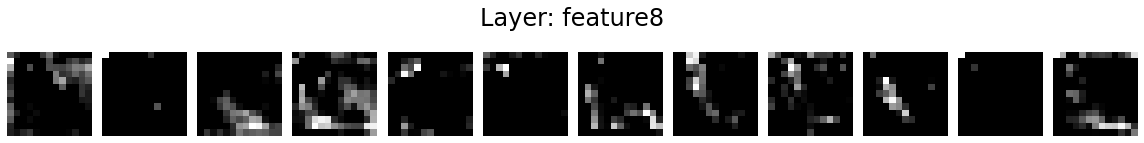

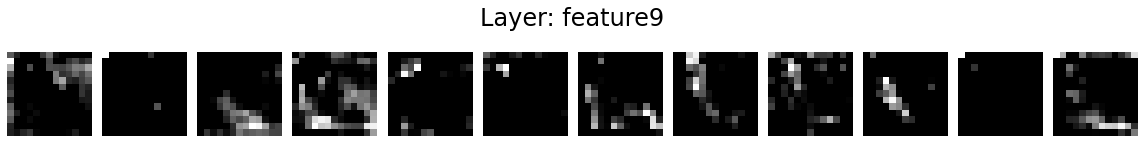

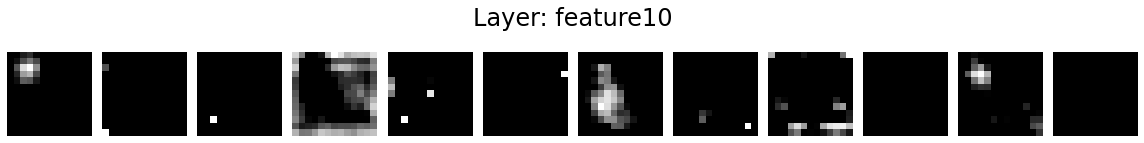

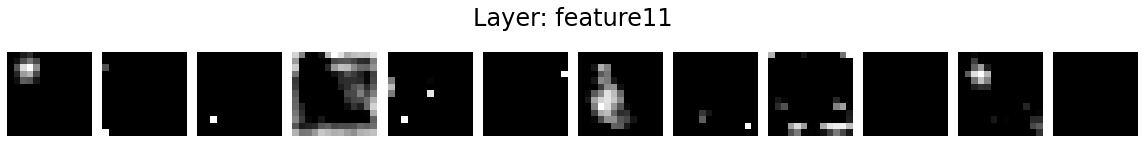

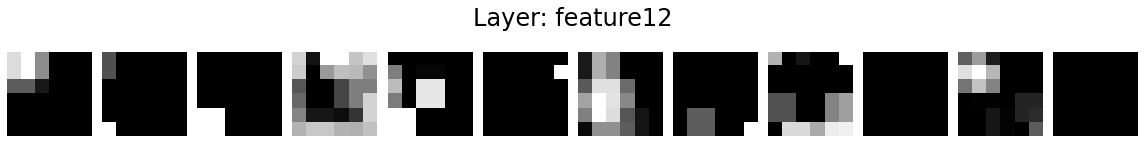

In [6]:
for layer_name, activations in activation_maps.items():
    if len(activations.shape) <= 2:
        continue
    fig = plt.figure(figsize=(16, 2))
    for i in range(12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.matshow(activations[0, i].detach().numpy(), cmap='gray')
        ax.axis('off')
    fig.suptitle('Layer: %s' % layer_name, fontsize=24)
    fig.tight_layout()

## Vision Transformer

Let's look at the activation maps of the vision transformers.

In [16]:
architecture = 'vit_b_32'        # networks' architecture
weights = 'vit_b_32'             # the pretrained weights
readout_kwargs = {               # parameters for loading activations from the pretrained network
    'architecture': architecture, 
    'weights': weights,
    'layers': models.available_layers(architecture)
}
activation_loader = models.ActivationLoader(**readout_kwargs)

In [17]:
# loading the activation maps
activation_maps = activation_loader(torch_img)
print('Layers whose activation maps is stored with corresponding size:')
for layer_name, activations in activation_maps.items():
    print('\tLayer: %s' % layer_name, '\tshape:', activations.shape)

Layers whose activation maps is stored with corresponding size:
	Layer: conv_proj 	shape: torch.Size([1, 768, 7, 7])
	Layer: block0 	shape: torch.Size([1, 50, 768])
	Layer: block1 	shape: torch.Size([1, 50, 768])
	Layer: block2 	shape: torch.Size([1, 50, 768])
	Layer: block3 	shape: torch.Size([1, 50, 768])
	Layer: block4 	shape: torch.Size([1, 50, 768])
	Layer: block5 	shape: torch.Size([1, 50, 768])
	Layer: block6 	shape: torch.Size([1, 50, 768])
	Layer: block7 	shape: torch.Size([1, 50, 768])
	Layer: block8 	shape: torch.Size([1, 50, 768])
	Layer: block9 	shape: torch.Size([1, 50, 768])
	Layer: block10 	shape: torch.Size([1, 50, 768])
	Layer: block11 	shape: torch.Size([1, 50, 768])
	Layer: fc 	shape: torch.Size([1, 1000])


From the print above, we can see the layers whose activation maps are loaded and the size of 
the activation maps:
 - The first dimension corresponds to batch size. This example is "1" because we have input
   the network with one image.
 - The `conv_proj` contains 768 kernels with spatial resolution $7 \times 7$.
 - The `blockX` layers are all a matrix of 50-by-768 elements. The first element is the
   "\[class\] embedding" and the other 49 correspond to the 7-by-7 position embedding of patches.
 - The `fc` layer is a one-dimensional vector of 1000 elements.